In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

In [14]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")
features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML


In [16]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2023, 2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

Loading data for 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for 2015
skipping  2015
Loading data for .DS_Store
Loading data for 2017
skipping  2017
Loading data for 2019
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2019/game_401127963.csv
Loading data for 2021
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2021/game_401326405.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2021/game_401326412.csv
Loading data for 2020
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/

In [24]:
import xgboost as xgb

class XGBoost:
    def __init__(self, **kwargs):
        self.model = xgb.XGBClassifier(
            n_estimators=100,
            max_depth=3,
            learning_rate=0.005,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric='auc'
        )
    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X, y):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
    def score(self, X, y):
        return self.model.score(X, y)


from lightgbm import LGBMClassifier

class LightGBM:
    def __init__(self, **kwargs):
        params = dict(
            n_estimators=500,
            max_depth=-1,        # -1 = full depth
            num_leaves=63,
            learning_rate=0.03,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary",
            metric="binary_logloss"
        )
        params.update(kwargs)
        self.model = LGBMClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def score(self, X, y):
        return self.model.score(X, y)


import catboost as cb

class CatBoost:
    def __init__(self, **kwargs):
        params = dict(
            iterations=300,
            depth=5,
            learning_rate=0.001,
            l2_leaf_reg=10,
            loss_function="Logloss",
            eval_metric="AUC",
            random_strength=1.0,
            bagging_temperature=1.0,
            verbose=False
        )
        params.update(kwargs)
        self.model = cb.CatBoostClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [18]:
training_data.keys()

dict_keys([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.7

In [25]:
models = {}
def setup_models(training_data, test_data):
    for timestep in training_data:
        timestep = round(timestep, 3)
        print(f"Processing timestep: {timestep}")
        X = training_data[timestep]
        y = np.array([row["label"] for row in X])
        X = np.array([row["rows"].reshape(-1) for row in X])
        y_test = np.array([row["label"] for row in test_data[timestep]])
        X_test = np.array([row["rows"].reshape(-1) for row in test_data[timestep]])
        # Evaluate model using the pipeline (preprocessing + logistic regression)
        model = XGBoost()
        model.fit(X, y)
         # Calculate training loss
        y_pred = model.predict_proba(X)[:, 1]  # Get probability predictions
        train_loss = -np.mean(y * np.log(y_pred + 1e-15) + (1-y) * np.log(1-y_pred + 1e-15))  # Binary cross entropy
        train_accuracy = model.score(X, y)

        y_test_pred = model.predict_proba(X_test)[:, 1]
        test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1-y_test) * np.log(1-y_test_pred + 1e-15))  # Binary cross entropy 
        test_accuracy = model.score(X_test, y_test)
        print(f"Timestep {timestep:.2%}: Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")
        models[timestep] = model


setup_models(training_data, test_data)

Processing timestep: 0.0
Timestep 0.00%: Training Loss = 0.6537, Accuracy = 0.6339, Test Loss = 0.6660, Test Accuracy = 0.6386
Processing timestep: 0.005
Timestep 0.50%: Training Loss = 0.6489, Accuracy = 0.6266, Test Loss = 0.6678, Test Accuracy = 0.6059
Processing timestep: 0.01
Timestep 1.00%: Training Loss = 0.6506, Accuracy = 0.6341, Test Loss = 0.6693, Test Accuracy = 0.6117
Processing timestep: 0.015
Timestep 1.50%: Training Loss = 0.6505, Accuracy = 0.6486, Test Loss = 0.6692, Test Accuracy = 0.6180
Processing timestep: 0.02
Timestep 2.00%: Training Loss = 0.6497, Accuracy = 0.6297, Test Loss = 0.6658, Test Accuracy = 0.6378
Processing timestep: 0.025
Timestep 2.50%: Training Loss = 0.6497, Accuracy = 0.6353, Test Loss = 0.6659, Test Accuracy = 0.6203
Processing timestep: 0.03
Timestep 3.00%: Training Loss = 0.6485, Accuracy = 0.6430, Test Loss = 0.6664, Test Accuracy = 0.5898
Processing timestep: 0.035
Timestep 3.50%: Training Loss = 0.6500, Accuracy = 0.6286, Test Loss = 0.66

In [47]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    timesteps_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
            timesteps_train.append(timestep)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    timesteps_train = np.array(timesteps_train).reshape(-1, 1)  # Column vector

    # Flatten all test data into single arrays
    X_test = []
    y_test = []
    timesteps_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
            timesteps_test.append(timestep)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    timesteps_test = np.array(timesteps_test).reshape(-1, 1)

    # # Optionally add timestep as a feature
    # X_train = np.hstack([X_train, timesteps_train])
    # X_test = np.hstack([X_test, timesteps_test])

    model = CatBoost()
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = -np.mean(y_train * np.log(y_train_pred + 1e-15) + (1 - y_train) * np.log(1 - y_train_pred + 1e-15))
    train_accuracy = model.score(X_train, y_train)

    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1 - y_test) * np.log(1 - y_test_pred + 1e-15))
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model

# model = setup_single_model(training_data, test_data)

0:	total: 27ms	remaining: 8.07s
1:	total: 50ms	remaining: 7.45s
2:	total: 69.5ms	remaining: 6.88s
3:	total: 90.9ms	remaining: 6.73s
4:	total: 110ms	remaining: 6.51s
5:	total: 133ms	remaining: 6.5s
6:	total: 153ms	remaining: 6.42s
7:	total: 174ms	remaining: 6.36s
8:	total: 194ms	remaining: 6.28s
9:	total: 214ms	remaining: 6.21s
10:	total: 234ms	remaining: 6.15s
11:	total: 257ms	remaining: 6.16s
12:	total: 277ms	remaining: 6.12s
13:	total: 298ms	remaining: 6.08s
14:	total: 321ms	remaining: 6.09s
15:	total: 341ms	remaining: 6.05s
16:	total: 361ms	remaining: 6s
17:	total: 380ms	remaining: 5.96s
18:	total: 399ms	remaining: 5.9s
19:	total: 418ms	remaining: 5.85s
20:	total: 437ms	remaining: 5.81s
21:	total: 458ms	remaining: 5.78s
22:	total: 481ms	remaining: 5.8s
23:	total: 501ms	remaining: 5.76s
24:	total: 521ms	remaining: 5.73s
25:	total: 542ms	remaining: 5.71s
26:	total: 563ms	remaining: 5.69s
27:	total: 583ms	remaining: 5.66s
28:	total: 602ms	remaining: 5.63s
29:	total: 621ms	remaining: 5.

Timestep 0.00%: Accuracy = 0.6386
Timestep 0.50%: Accuracy = 0.6059
Timestep 1.00%: Accuracy = 0.6117
Timestep 1.50%: Accuracy = 0.6180
Timestep 2.00%: Accuracy = 0.6378
Timestep 2.50%: Accuracy = 0.6203
Timestep 3.00%: Accuracy = 0.5898
Timestep 3.50%: Accuracy = 0.6127
Timestep 4.00%: Accuracy = 0.6098
Timestep 4.50%: Accuracy = 0.6505
Timestep 5.00%: Accuracy = 0.6474
Timestep 5.50%: Accuracy = 0.6338
Timestep 6.00%: Accuracy = 0.5964
Timestep 6.50%: Accuracy = 0.6317
Timestep 7.00%: Accuracy = 0.6172
Timestep 7.50%: Accuracy = 0.6613
Timestep 8.00%: Accuracy = 0.6584
Timestep 8.50%: Accuracy = 0.6538
Timestep 9.00%: Accuracy = 0.6352
Timestep 9.50%: Accuracy = 0.6587
Timestep 10.00%: Accuracy = 0.6003
Timestep 10.50%: Accuracy = 0.6604
Timestep 11.00%: Accuracy = 0.6580
Timestep 11.50%: Accuracy = 0.7046
Timestep 12.00%: Accuracy = 0.6887
Timestep 12.50%: Accuracy = 0.6735
Timestep 13.00%: Accuracy = 0.6443
Timestep 13.50%: Accuracy = 0.6374
Timestep 14.00%: Accuracy = 0.7045
Times

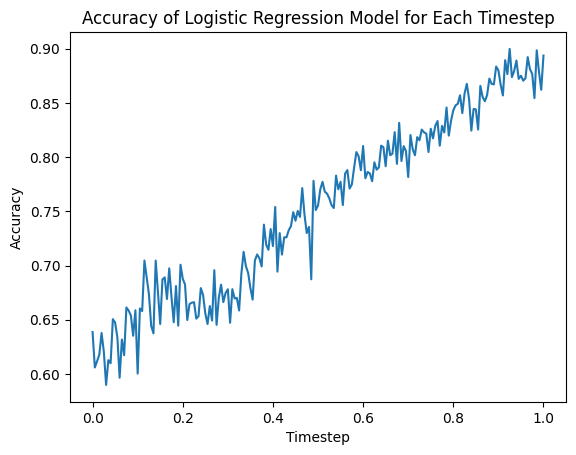

In [26]:
# Test accuracy of model for each timestep on test data and plot
accuracies = []
timesteps = []

for timestep, i in zip(models, test_data.keys()):
    model = models[timestep]
    # Convert test data to array
    y_test = np.array([row["label"] for row in test_data[i]])
    X_test = np.array([row["rows"].reshape(-1) for row in test_data[i]])
    # Evaluate model using the pipeline (preprocessing + logistic regression)
    accuracy = model.score(X_test, y_test)
    print(f"Timestep {timestep:.2%}: Accuracy = {accuracy:.4f}")
    accuracies.append(accuracy)
    timesteps.append(timestep)

plt.plot(timesteps, accuracies)
plt.xlabel("Timestep")
plt.ylabel("Accuracy")
plt.title("Accuracy of Logistic Regression Model for Each Timestep")
plt.show()

In [27]:
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from process_data import write_predictions

write_predictions(models, interpolated_dir, [2023, 2024], 0, features, replace_nan_val = 0, phat_b = "xgboost_phat_b")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces